# Notebook info

# Package setup

## System-level setup

In [2]:
from __future__ import print_function
## Flag for Colab setup
USE_COLAB = False

In [3]:
#@title
# Useful for Colab
# !pip install geopandas
# !pip install rtree
# !sudo apt-get update && apt-get install -y libspatialindex-dev
# !pip install spatiallibindex

# #@title
# # This setup is useful for Colab and other environments with pesky setup for Geopandas
# !apt-get install -qq curl g++ make
# !curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
# import os
# os.chdir('spatialindex-src-1.8.5')
# !make
# !make install
# !pip install rtree
# !ldconfig
# from rtree import index
# from rtree.index import Rtree

## Import libraries

In [4]:
#@title
# PATH MANAGEMENT
# OS-independent setup
import os
from pathlib import Path

# Usually run paths 1 folder above scripts
CWD = Path.cwd() / '..'
HOME = Path.home()

if USE_COLAB:
    CWD = Path(CWD / 'drive' / 'Colab Notebooks')
    print(f"We're running on Colab... alternative CWD: {CWD}")

DATA_IN = CWD / 'data_in'
DATA_OUT = CWD / 'data_out'
VIZ_OUT = CWD / "viz"

# os.chdir(HOME / 'LocalDev' / 'data-analysis-template')

print(f"""PATH SETUP: 
---
cwd is {CWD}

Refer to these paths for IO operations:
HOME: {HOME}
DATA_IN: {DATA_IN}
DATA_OUT: {DATA_OUT}
VIZ_OUT: {VIZ_OUT}
""")

PATH SETUP: 
---
cwd is /app/scripts/..

Refer to these paths for IO operations:
HOME: /root
DATA_IN: /app/scripts/../data_in
DATA_OUT: /app/scripts/../data_out
VIZ_OUT: /app/scripts/../viz



In [5]:
# Importing analysis libraries
import datetime
import pandas as pd
import numpy as np


In [6]:
# Data Viz
# good ol matplotlib
import matplotlib.pyplot as plt
# Easier mplt's
import seaborn as sns

# Vega-Lite for interactive

import altair as alt
# cache to disk,
# https://altair-viz.github.io/user_guide/faq.html
# alt.data_transformers.enable('json')
# alt.data_transformers.disable_max_rows()

# high-performance plotting
# import bokeh
# from bokeh.io import output_notebook, show, output_file
# from bokeh.plotting import figure
# from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
# from bokeh.palettes import brewer

In [7]:
# ML/deep learning
# https://scikit-learn.org/stable/modules/classes.html
import sklearn as sk
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.model_selection import train_test_split

In [8]:
import statsmodels as sm
## For specifying models
import patsy
from patsy import dmatrix
# import hdbscan

ModuleNotFoundError: No module named 'statsmodels'

In [9]:
# from keras.models import Sequential
# from keras import layers

In [10]:
## INTERACTIVE WIDGETS :-)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
# Geospatial stuff
# GIS
import geopandas as gpd
import fiona
import shapely.geometry
from shapely.geometry import Point
# import keplergl

In [12]:
## URL parsing made EZ and OO-style
import urllib
from urllib.parse import urlparse
from urllib.parse import urlencode
import requests

# Web/data input libraries
import json

## For connections to PostgreSQL
# import psycopg2

### EXAMPLE 
# Encode params to a dictionary
params = {
    'Key': 1231,
    "Key2" : "stringyone"
}
urlencode(params)

'Key=1231&Key2=stringyone'

## Jupyter notebook options and viz options

In [13]:
# Options for python notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
np.set_printoptions(precision=3, suppress=True)

In [14]:
# Theming for plots + high DPI figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Analysis

# Load and verify data

In [15]:
# # Get a URL for county-level shapefile!
# # us.states.NY.shapefile_urls()['county']
# import zipfile
# def getZipFile(url):
#     from urllib.request import urlopen
#     from zipfile import ZipFile
#     zipurl = 'Valid URL to zip file'
#         # Download the file from the URL
#     zipresp = urlopen(url)
#         # Create a new file on the hard drive
#     tempzip = open(DATA_IN / "tempfile.zip", "wb")
#         # Write the contents of the downloaded file into the new file
#     tempzip.write(zipresp.read())
#         # Close the newly-created file
#     tempzip.close()
#         # Re-open the newly-created file with ZipFile()
#     zf = ZipFile(DATA_IN / "tempfile.zip")
#         # Extract its contents into <extraction_path>
#         # note that extractall will automatically create the path
#     zf.extractall(path = CWD / 'temp')
#         # close the ZipFile instance
#     zf.close()
# getZipFile(us.states.NY.shapefile_urls()['county'])

In [16]:
# Helper function to clean column names :-)
# https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd
def clean_column_names(df:pd.DataFrame)->pd.DataFrame:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    return df

# Visualization

(0.0, 2.0)

Text(0.5, 0, 'time')

Text(0, 0.5, 's1 and s2')

Text(0, 0.5, 'coherence')

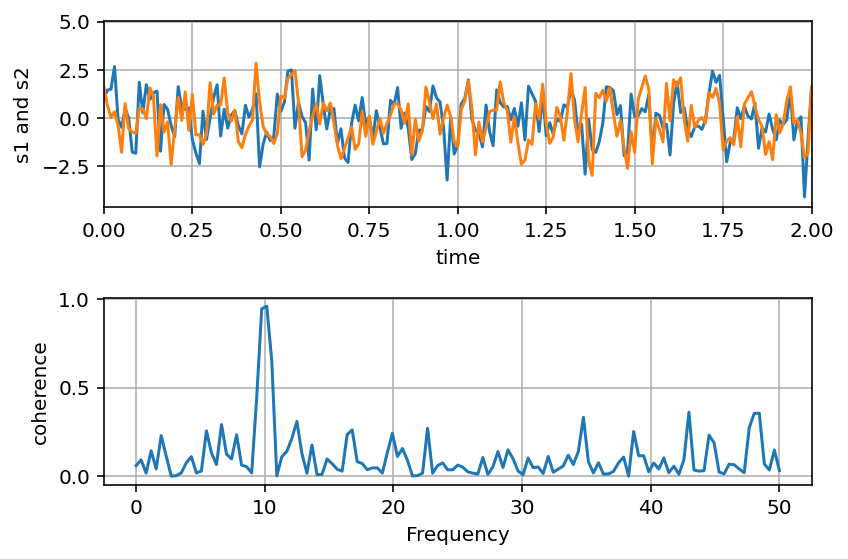

In [17]:

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()